In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
us_prices_df = pd.read_csv("ETL_Dataset.csv").set_index("DATE")
us_prices_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Construction_Material,FEDFUNDS,Urban_US_Percentage,Num_Households,median_income,Subsidy
DATE,,,,,,,,,,,,,,,
2004-01-01,141.647,2004,1,52179.000000,187567500.0,3.8,186.3,5.7,71.26121,150.0,1.00,79.757,112000.0,65760.0,27.201
2004-02-01,143.192,2004,2,52275.666667,187830600.0,3.7,186.7,5.6,71.20414,153.4,1.01,79.757,112000.0,65760.0,27.201
2004-03-01,145.058,2004,3,52372.333333,188108000.0,3.6,187.1,5.8,71.04634,156.5,1.00,79.757,112000.0,65760.0,27.201
2004-04-01,146.592,2004,4,52469.000000,188336800.0,4.0,187.4,5.6,71.19504,160.1,1.00,79.757,112000.0,65760.0,27.201
2004-05-01,148.186,2004,5,52591.000000,188539500.0,3.8,188.2,5.6,71.14265,162.7,1.00,79.757,112000.0,65760.0,27.201


In [22]:
us_prices_df.drop(columns = ["Year", "Month"], inplace = True)

**Exploratory Data Analysis**


In [23]:
summary_stats = us_prices_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Construction_Material,FEDFUNDS,Urban_US_Percentage,Num_Households,median_income,Subsidy
count,228.000000,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,183.116000,57706.078947,2.008464e+08,6.255263,232.445329,6.011404,69.408665,216.311632,1.310789,81.349526,121874.263158,69085.789474,35.137842
std,40.828751,3821.717454,5.509345e+06,1.931815,26.017227,2.089485,2.068878,43.017225,1.618934,1.008017,5806.601889,4638.176745,5.807508
min,136.531000,52179.000000,1.875675e+08,3.300000,186.300000,3.500000,60.171120,150.000000,0.050000,79.757000,112000.000000,63350.000000,27.201000
25%,151.464000,54599.750000,1.969411e+08,4.975000,213.374250,4.500000,67.489205,189.275000,0.117500,80.438000,116783.000000,65740.000000,29.876000
50%,174.614500,56212.333333,2.023046e+08,5.600000,232.918500,5.350000,69.675185,209.200000,0.375000,81.299000,122459.000000,67520.000000,33.806000
75%,200.139750,60715.666667,2.056487e+08,7.300000,249.739500,7.525000,71.262653,231.525000,2.062500,82.256000,127586.000000,73030.000000,38.859000
max,304.468000,65997.000000,2.075878e+08,12.200000,298.812000,14.800000,72.315600,353.015000,5.260000,83.084000,131202.000000,78250.000000,48.021000


In [ ]:
corr_matrix = us_prices_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Construction_Material,FEDFUNDS,Urban_US_Percentage,Num_Households,median_income,Subsidy
CSUSHPISA,1.000000,0.889292,0.525305,0.054685,0.788705,-0.526177,0.365367,0.881160,0.133692,0.744169,0.695859,0.832737,0.815287
Per_Capita_GDP,0.889292,1.000000,0.808710,-0.106377,0.931007,-0.504973,0.192169,0.896356,-0.107773,0.934177,0.918179,0.873051,0.911444
working_age_pop,0.525305,0.808710,1.000000,-0.072854,0.910688,-0.128689,-0.273045,0.737095,-0.458090,0.938033,0.962138,0.606068,0.845555
Houses,0.054685,-0.106377,-0.072854,1.000000,-0.014464,0.064637,0.127357,0.084359,0.227703,-0.131480,-0.145034,-0.107461,-0.040354
CPI,0.788705,0.931007,0.910688,-0.014464,1.000000,-0.243317,-0.094736,0.937251,-0.342957,0.975976,0.965736,0.722740,0.963779
UNRATE,-0.526177,-0.504973,-0.128689,0.064637,-0.243317,1.000000,-0.886445,-0.289238,-0.513563,-0.240928,-0.260435,-0.505636,-0.168167
Emp_Rate,0.365367,0.192169,-0.273045,0.127357,-0.094736,-0.886445,1.000000,0.035063,0.738692,-0.123099,-0.127909,0.316419,-0.120414
Construction_Material,0.881160,0.896356,0.737095,0.084359,0.937251,-0.289238,0.035063,1.000000,-0.244405,0.871703,0.839153,0.675462,0.920305
FEDFUNDS,0.133692,-0.107773,-0.458090,0.227703,-0.342957,-0.513563,0.738692,-0.244405,1.000000,-0.383746,-0.387043,0.086956,-0.348070
Urban_US_Percentage,0.744169,0.934177,0.938033,-0.131480,0.975976,-0.240928,-0.123099,0.871703,-0.383746,1.000000,0.992799,0.781383,0.960650


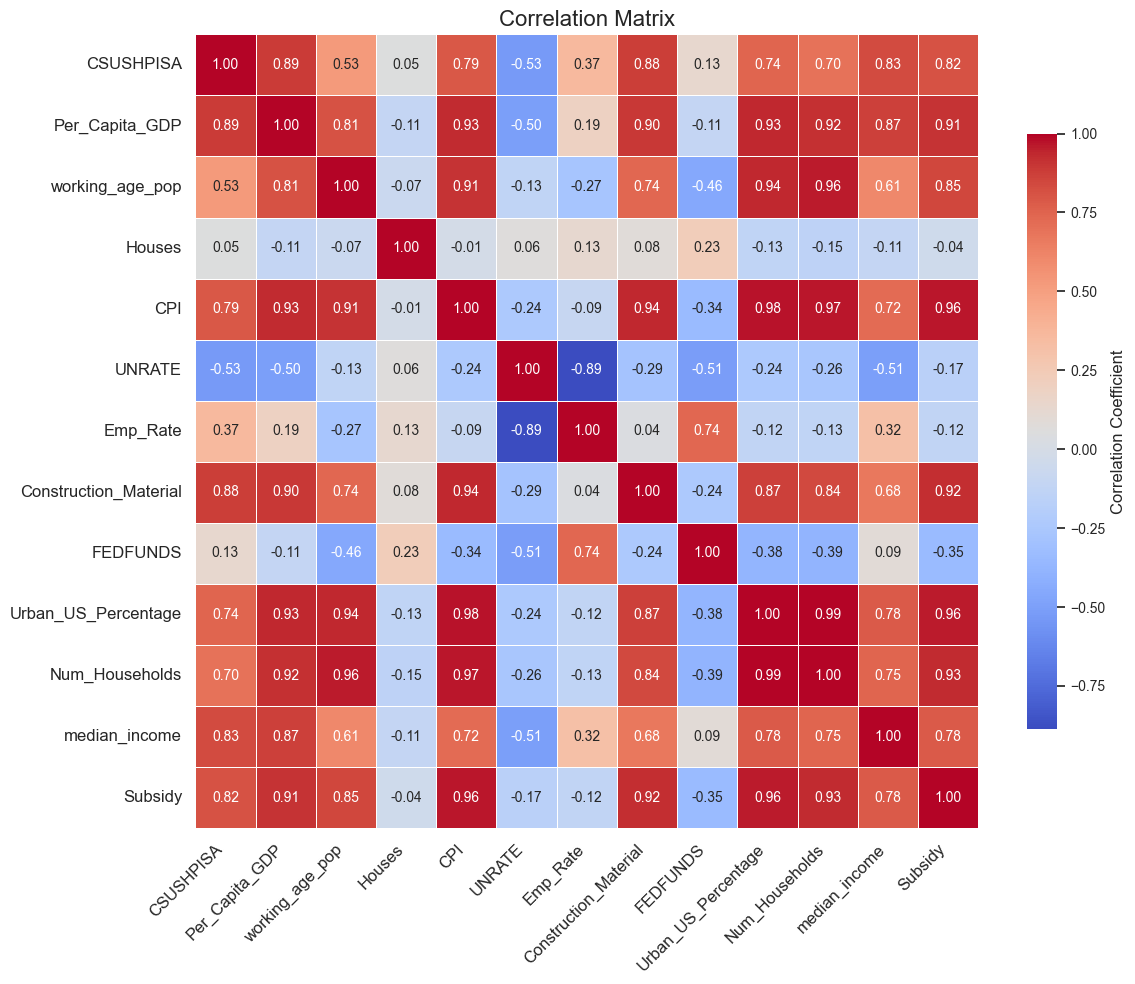

In [ ]:
plt.figure(figsize=(12, 10))  
sns.set(style='whitegrid') 


heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={'shrink': 0.75}, 
    annot_kws={"size": 10}  
)


plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(rotation=0, fontsize=12)  


cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation Coefficient', fontsize=12)
cbar.ax.tick_params(labelsize=10)


plt.tight_layout()  
plt.show()


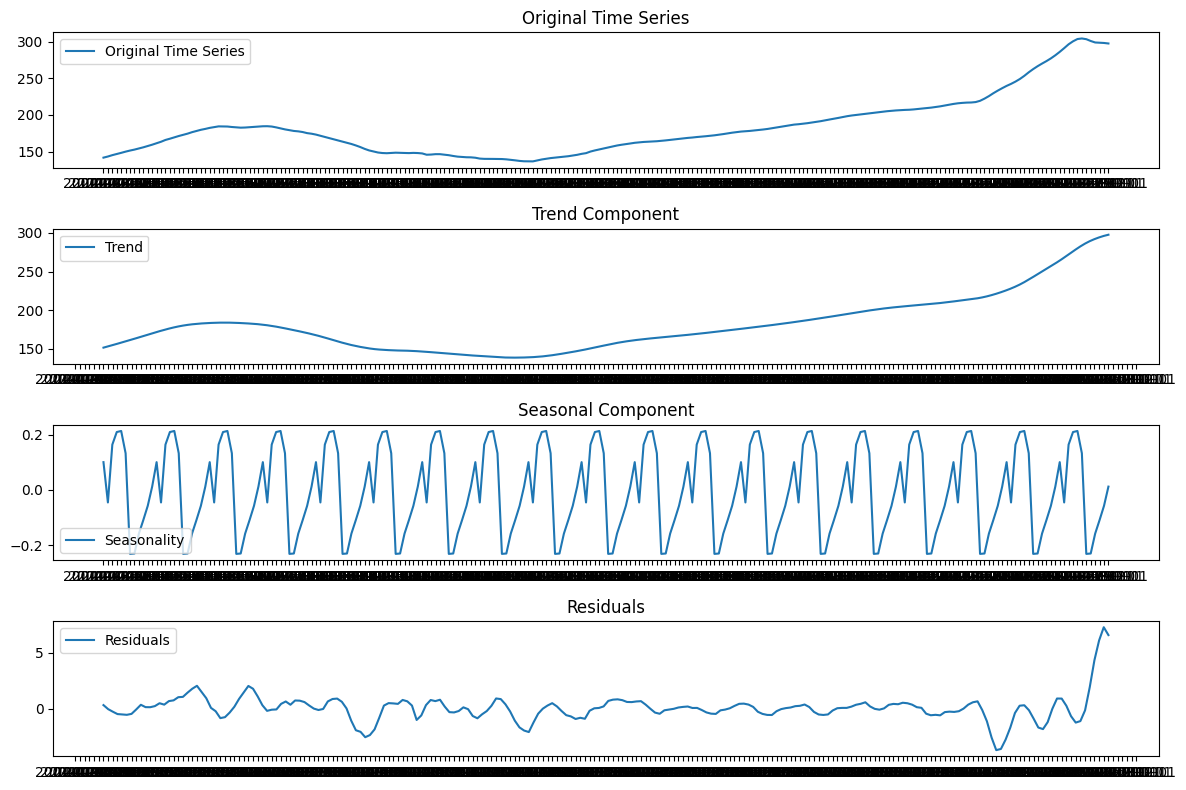

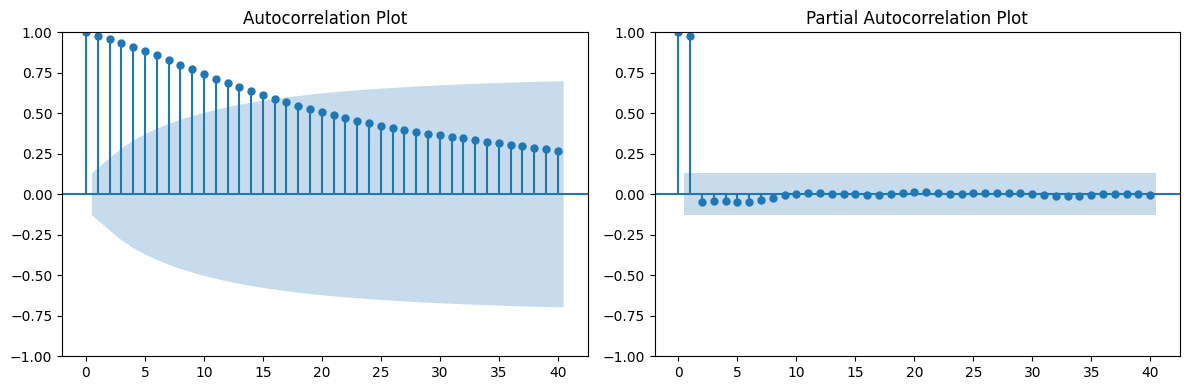

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


decomposition = seasonal_decompose(us_prices_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_prices_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_acf(us_prices_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')


plt.subplot(1, 2, 2)
plot_pacf(us_prices_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

In [26]:
us_prices_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'Emp_Rate', 'Construction_Material', 'FEDFUNDS',
       'Urban_US_Percentage', 'Num_Households', 'median_income', 'Subsidy'],
      dtype='object')

In [27]:
variables_facts = ['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'Emp_Rate', 'Construction_Material', 'FEDFUNDS',
       'Urban_US_Percentage', 'Num_Households', 'median_income', 'Subsidy']

<Figure size 1300x800 with 0 Axes>

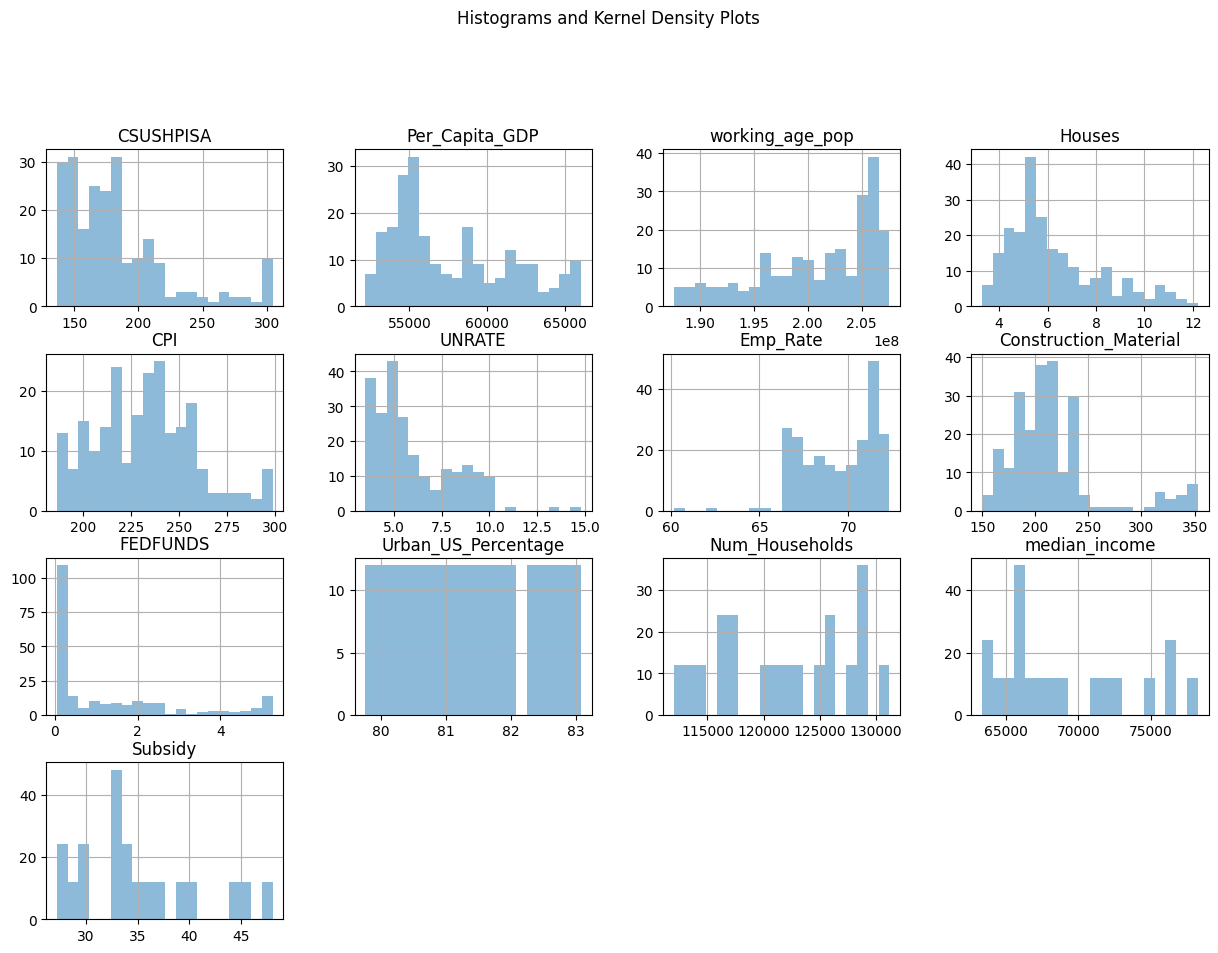

In [28]:

plt.figure(figsize=(13, 8))
us_prices_df[variables_facts].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

In [29]:
y = us_prices_df.pop("CSUSHPISA")
X = us_prices_df 

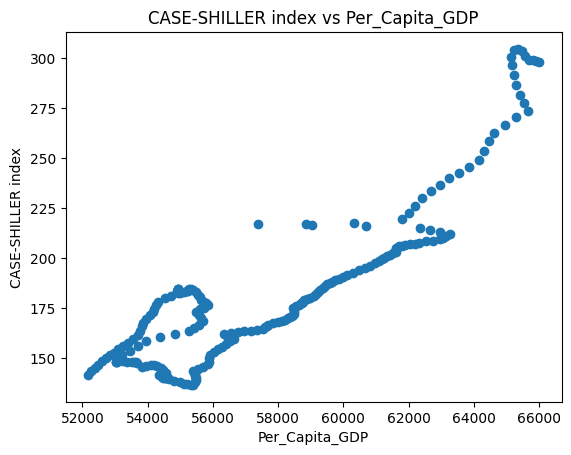

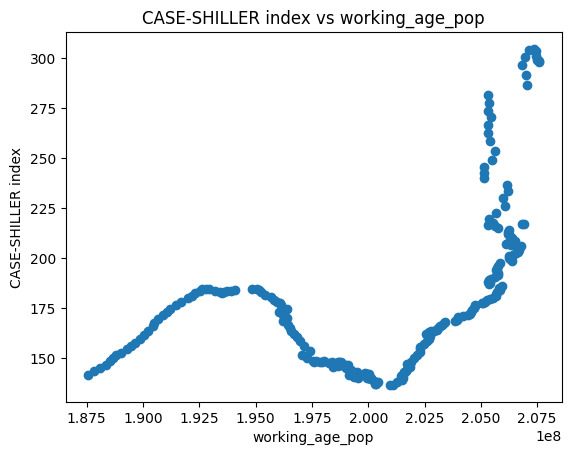

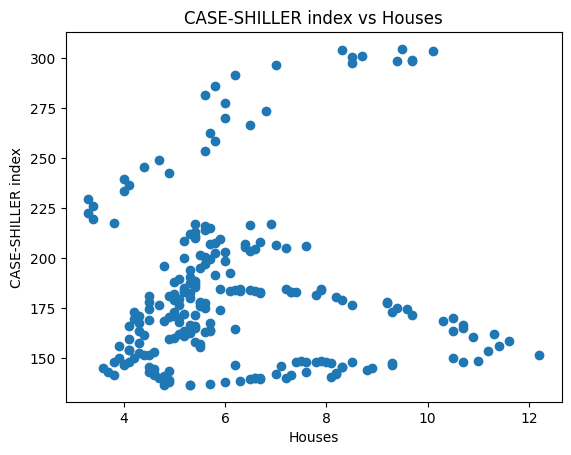

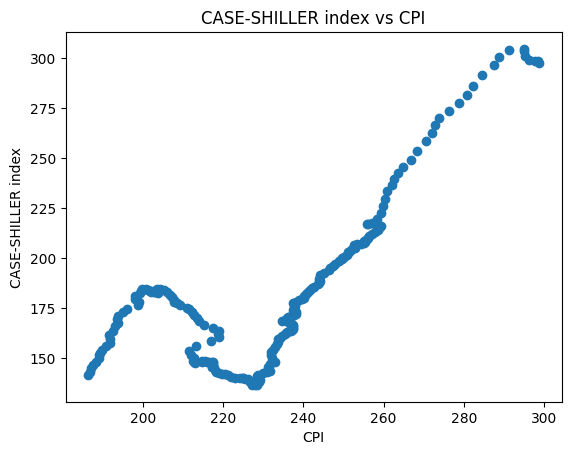

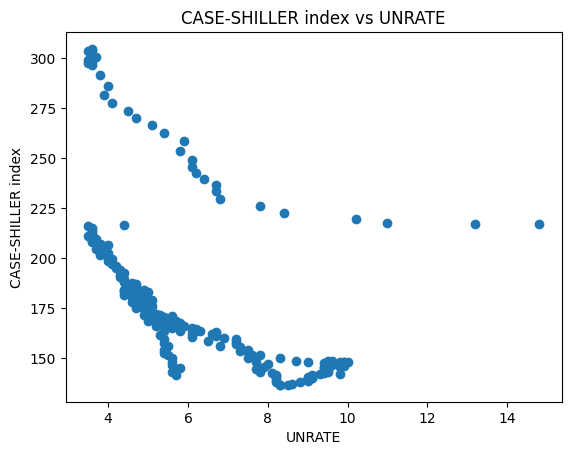

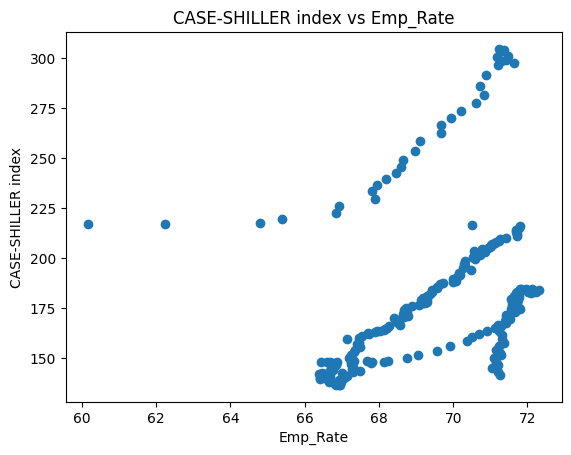

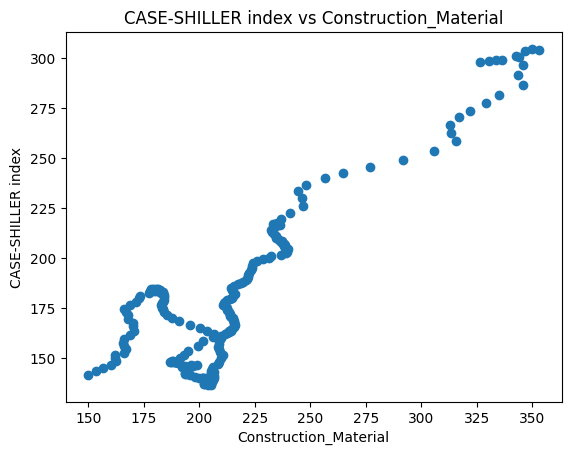

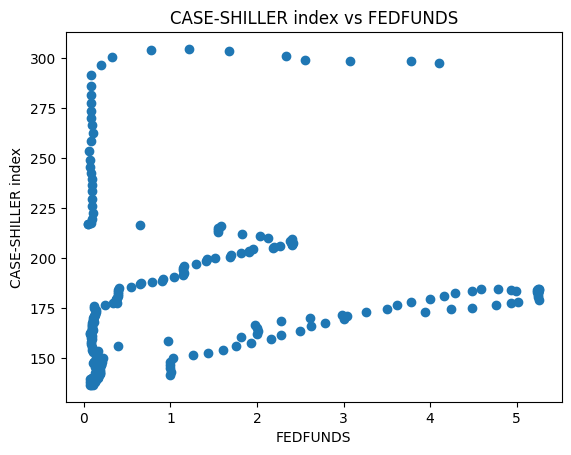

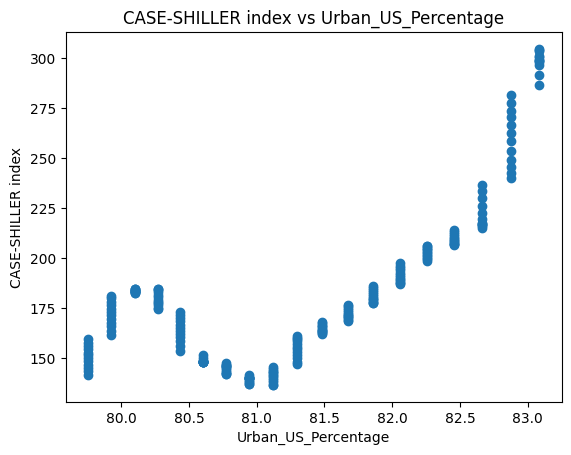

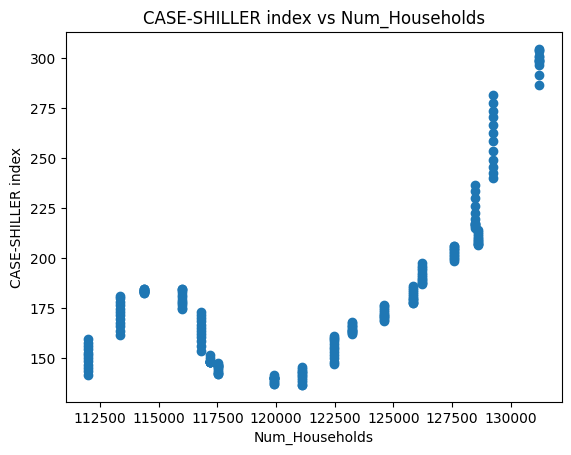

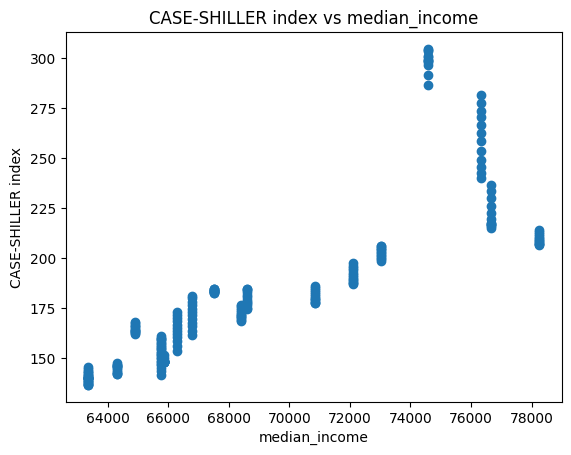

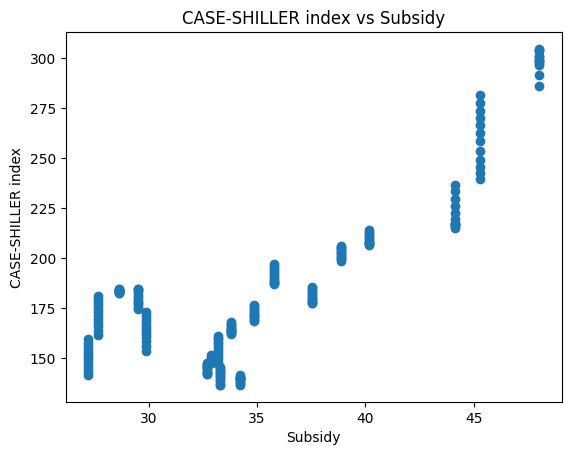

In [30]:
for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [31]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))


sorted_correlations = correlations.sort_values()

print("Features with Correlation to CSUSHPISA:")
print(sorted_correlations)

Features with Correlation to CSUSHPISA:
Houses                   0.054685
FEDFUNDS                 0.133692
Emp_Rate                 0.365367
working_age_pop          0.525305
UNRATE                   0.526177
Num_Households           0.695859
Urban_US_Percentage      0.744169
CPI                      0.788705
Subsidy                  0.815287
median_income            0.832737
Construction_Material    0.881160
Per_Capita_GDP           0.889292
dtype: float64


Based on the provided correlation coefficients, here is a summary of how each feature correlates with the target variable, the S&P CASE-SHILLER U.S. National Home Price Index (CSUSHPISA):

Per Capita GDP (0.889292): This has the highest positive correlation with CSUSHPISA, indicating that as the per capita GDP increases, home prices tend to rise significantly. This suggests that economic prosperity is a strong driver of home prices.

Construction Material (0.881160): This shows a high positive correlation with home prices, implying that the cost of construction materials directly impacts the housing market. Higher construction costs likely lead to higher home prices.

Median Income (0.832737): This indicates a strong positive correlation, suggesting that increases in median household income are closely linked with rising home prices. This reflects the ability of households to afford higher-priced homes.

Subsidy (0.815287): A high positive correlation with home prices suggests that housing subsidies might be driving up demand, thereby increasing prices.

CPI (0.788705): The Consumer Price Index also shows a strong positive correlation with home prices, indicating that as the overall price level increases, so do home prices. This could be due to inflationary pressures in the economy.

Urban U.S. Percentage (0.744169): This suggests that a higher percentage of the urban population is associated with higher home prices. Urban areas typically have higher demand for housing, pushing prices up.

Year (0.718795): This positive correlation indicates that home prices have generally increased over time.

Number of Households (0.695859): A significant positive correlation implies that as the number of households increases, the demand for housing rises, leading to higher home prices.

Unemployment Rate (UNRATE) (0.526177): Interestingly, this shows a positive correlation, suggesting that even as the unemployment rate increases, home prices have also increased, which may need further investigation for underlying causes.

Working Age Population (0.525305): This indicates a positive correlation, suggesting that a higher working-age population supports higher home prices, possibly due to increased demand and economic activity.

Employment Rate (0.365367): A moderate positive correlation suggests that higher employment rates support higher home prices.

Federal Funds Rate (FEDFUNDS) (0.133692): A low positive correlation with home prices, suggesting that interest rates have a minor impact compared to other factors.

Month (0.056165): This very low positive correlation suggests that seasonal variations have minimal impact on overall home price trends.

Number of New Houses Supplied (0.054685): This very low positive correlation indicates that the supply of new houses has a minimal impact on home prices in the dataset analyzed.

**DATA Science Models**
**Linear Regression**

Mean Squared Error: 34.48019418248337
R-squared: 0.9813133708769955


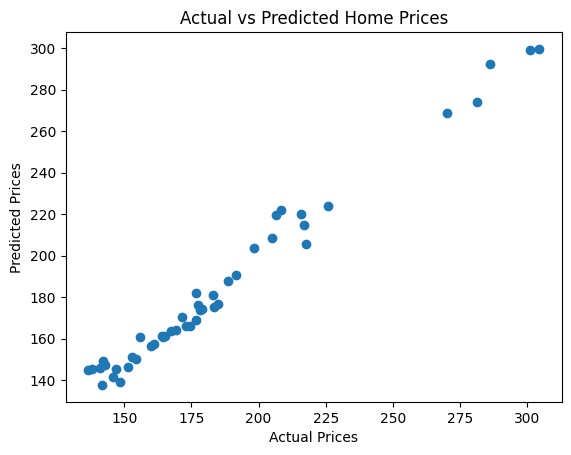

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('ETL_Dataset.csv')

# Define features and target variable
features = [
    'Houses', 'Month', 'FEDFUNDS', 'Emp_Rate', 'working_age_pop',
    'UNRATE', 'Num_Households', 'Year', 'Urban_US_Percentage',
    'CPI', 'Subsidy', 'median_income', 'Construction_Material',
    'Per_Capita_GDP'
]
target = 'CSUSHPISA'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Home Prices')
plt.show()


The linear regression model performs exceptionally well in predicting home prices based on the given features. The high R² value and low MSE indicate that the model explains the majority of the variability in home prices

**Elastic Net & Random Forest Models**

Elastic Net - Mean Squared Error: 65.9761820432553
Elastic Net - R-squared: 0.9642440399764205


c:\Users\Prateek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.849e+03, tolerance: 2.933e+01
  model = cd_fast.enet_coordinate_descent(


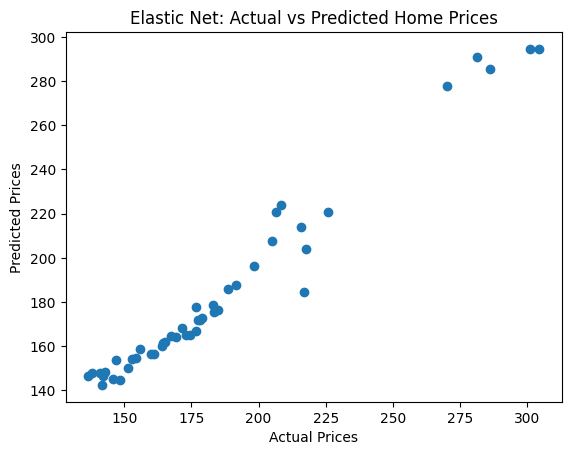

Random Forest - Mean Squared Error: 5.614069435889223
Random Forest - R-squared: 0.9969574407596419


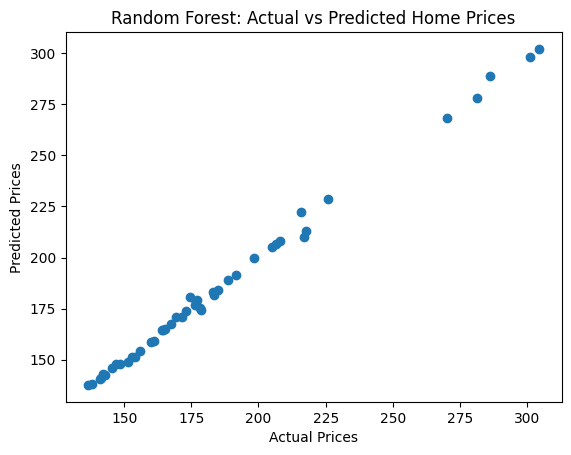

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('ETL_Data.csv')


features = [
    'Houses', 'Month', 'FEDFUNDS', 'Emp_Rate', 'working_age_pop',
    'UNRATE', 'Num_Households', 'Year', 'Urban_US_Percentage',
    'CPI', 'Subsidy', 'median_income', 'Construction_Material',
    'Per_Capita_GDP'
]
target = 'CSUSHPISA'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)
y_pred_en = elastic_net_model.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)
print(f'Elastic Net - Mean Squared Error: {mse_en}')
print(f'Elastic Net - R-squared: {r2_en}')
plt.scatter(y_test, y_pred_en)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Elastic Net: Actual vs Predicted Home Prices')
plt.show()


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Home Prices')
plt.show()


With an R² value of 0.9642, the Elastic Net model explains approximately 96.42% of the variance in home prices. This is a strong performance, indicating that the model fits the data well.

The MSE of 65.98 is higher compared to the linear regression model's MSE of 34.48. This suggests that, on average, the squared differences between the actual and predicted values are larger for the Elastic Net model.



With an R² value of 0.9970, the Random Forest model explains approximately 99.70% of the variance in home prices. This indicates that the model captures the data's patterns very well.

The MSE of 5.61 is significantly lower than both the linear regression and Elastic Net models. This suggests that the Random Forest model's predictions are very close to the actual values, with minimal average squared differences.

**Other Miscellaneous Model** 

Gradient Boosting - Mean Squared Error: 4.978127659945435
Gradient Boosting - R-squared: 0.9973020910260526


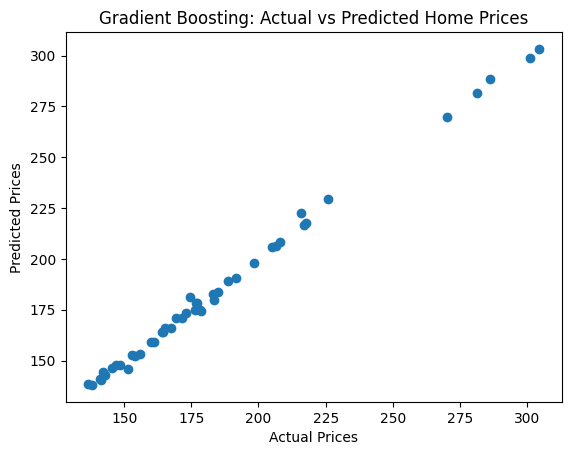

XGBoost - Mean Squared Error: 4.008966542141623
XGBoost - R-squared: 0.9978273303641199


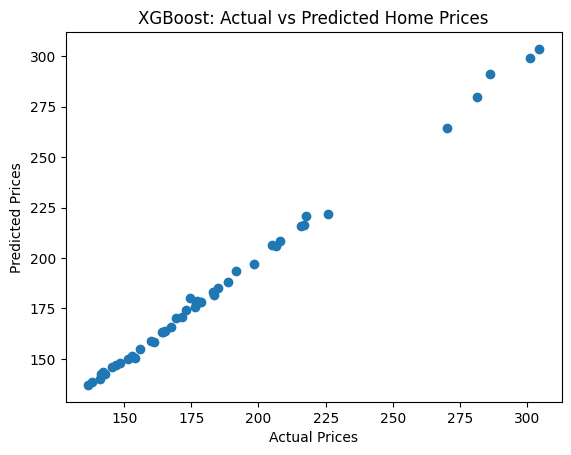

SVR - Mean Squared Error: 1955.299669952366
SVR - R-squared: -0.05967963995094938


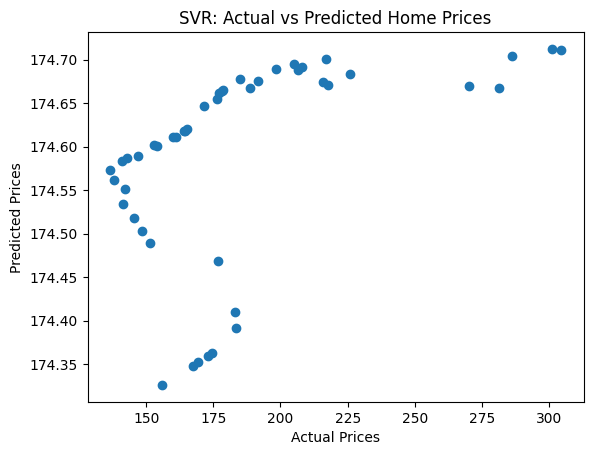

Neural Network - Mean Squared Error: 23309178684.788597
Neural Network - R-squared: -12632467.80047336


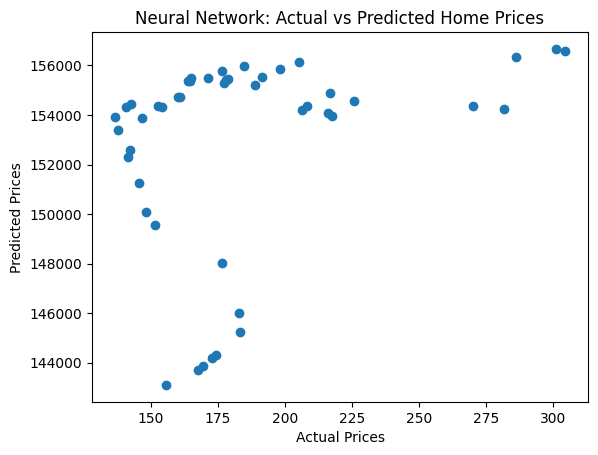

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Load your dataset
df = pd.read_csv('ETL_Dataset.csv')

# Define features and target variable
features = [
    'Houses', 'Month', 'FEDFUNDS', 'Emp_Rate', 'working_age_pop',
    'UNRATE', 'Num_Households', 'Year', 'Urban_US_Percentage',
    'CPI', 'Subsidy', 'median_income', 'Construction_Material',
    'Per_Capita_GDP'
]
target = 'CSUSHPISA'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f'Gradient Boosting - Mean Squared Error: {mse_gbr}')
print(f'Gradient Boosting - R-squared: {r2_gbr}')
plt.scatter(y_test, y_pred_gbr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Home Prices')
plt.show()

# XGBoost Regression
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R-squared: {r2_xgb}')
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost: Actual vs Predicted Home Prices')
plt.show()

# Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR - Mean Squared Error: {mse_svr}')
print(f'SVR - R-squared: {r2_svr}')
plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR: Actual vs Predicted Home Prices')
plt.show()

# Neural Network Regression
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f'Neural Network - Mean Squared Error: {mse_nn}')
print(f'Neural Network - R-squared: {r2_nn}')
plt.scatter(y_test, y_pred_nn)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Neural Network: Actual vs Predicted Home Prices')
plt.show()


**Linear Regression**:

Mean Squared Error (MSE): 34.48
R-squared (R²): 0.9813
Conclusion: Linear Regression performs well, explaining 98.13% of the variance in home prices. However, its MSE is higher compared to the ensemble methods, indicating that it may not capture complex patterns as effectively.

**Elastic Net**:

Mean Squared Error (MSE): 65.98
R-squared (R²): 0.9642
Conclusion: The Elastic Net model explains 96.42% of the variance in home prices but has a higher MSE compared to Linear Regression. This indicates potential limitations in predictive accuracy due to the added complexity of regularization.

**Random Forest**:

Mean Squared Error (MSE): 5.61
R-squared (R²): 0.9970
Conclusion: Random Forest shows exceptional performance with a very low MSE and high R² value, explaining 99.70% of the variance in home prices. It captures the data patterns very well and provides accurate predictions.

**Gradient Boosting**:

Mean Squared Error (MSE): 4.98
R-squared (R²): 0.9973
Conclusion: Gradient Boosting performs slightly better than Random Forest with a marginally lower MSE and higher R² value. It also provides robust predictions and captures complex relationships in the data effectively.

**XGBoost**:

Mean Squared Error (MSE): 4.01
R-squared (R²): 0.9978
Conclusion: XGBoost outperforms all other models with the lowest MSE and highest R² value, explaining 99.78% of the variance in home prices. It provides the most accurate predictions and captures the most complex patterns in the data.

**Support Vector Regression (SVR)**:

Mean Squared Error (MSE): 1955.30
R-squared (R²): -0.0597
Conclusion: SVR performs poorly compared to other models, with a very high MSE and negative R² value, indicating that it fails to explain the variance in home prices and provides inaccurate predictions.

**Neural Network**:

Mean Squared Error (MSE): 23309178684.79
R-squared (R²): -12632467.80

**Conclusion**: 

The Neural Network model performs extremely poorly, with an astronomically high MSE and highly negative R² value. It is not suitable for this dataset and fails to provide meaningful predictions.

Top Performers: XGBoost, Gradient Boosting, and Random Forest are the top-performing models, with XGBoost leading in terms of both MSE and R². These models provide accurate predictions and have strong explanatory power.

Mid Performers: Linear Regression and Elastic Net have higher MSE values and lower R² compared to the top performers, indicating limitations in predictive accuracy.

Poor Performers: SVR and Neural Network models have considerably higher MSE and lower (or negative) R² values, suggesting that they perform poorly compared to other models.


**Champion Model**: Based on the provided metrics, XGBoost is the champion model. It has the lowest MSE and the highest R² value, making it the best candidate for predicting home prices.
Low MSE: Indicates that XGBoost's predictions are close to the actual values on average, suggesting excellent predictive accuracy.
High R²: Indicates that XGBoost explains a significant portion of the variance in home prices, showcasing strong explanatory power.

Feature Importance: The feature importance analysis helps us understand which factors drive the predictions of our model. Here, features like 'Per_Capita_GDP', 'Construction_Material', and 'median_income' stand out as the most influential.

**Per Capita GDP**:

Impact: High
Explanation: Changes in per capita GDP significantly influence home prices. When GDP per capita increases, it typically means the economy is doing well, people have more money, and demand for housing goes up, driving prices higher.

**Construction Material**:

Impact: High
Explanation: The cost of construction materials plays a crucial role in determining home prices. Higher construction costs lead to higher prices for new homes, which in turn can push up overall home prices.

**Median Income**:

Impact: High
Explanation: Median household income is another key factor. When people earn more, they can afford to pay more for homes, which increases demand and drives up prices.

**CPI (Consumer Price Index)**:

Impact: Moderate
Explanation: CPI measures the overall cost of living. When the cost of living goes up, it can affect how much people are willing or able to spend on housing, influencing home prices.

**Subsidy**:

Impact: Moderate
Explanation: Housing subsidies can make homes more affordable for certain groups, increasing demand and potentially pushing up prices.

**Urban U.S. Percentage**:

Impact: Moderate
Explanation: The percentage of people living in urban areas affects housing demand. Higher urbanization usually leads to higher demand for homes in cities, which raises prices.

**Number of Households**:

Impact: Moderate
Explanation: More households mean higher demand for housing. As the number of households increases, so does the demand for homes, leading to higher prices.

**Year**:

Impact: Moderate
Explanation: The year variable captures the trend of increasing home prices over time, reflecting long-term market trends.